In [ ]:
pip install --upgrade pip'

/bin/bash: -c: line 0: unexpected EOF while looking for matching `''
/bin/bash: -c: line 1: syntax error: unexpected end of file


In [ ]:
import numpy as np
import pandas as pd, datetime
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from time import time
import os
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import  ARIMA
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score
from pandas import DataFrame
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [ ]:
store = pd.read_csv('/content/store.csv')
train = pd.read_csv('/content/train.csv', index_col='Date', parse_dates=True)
test = pd.read_csv('/content/test.csv')
train.shape, test.shape, store.shape

((196220, 8), (41088, 8), (1115, 10))

In [ ]:
train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263.0,555.0,1.0,1.0,0,1.0
2015-07-31,2,5,6064.0,625.0,1.0,1.0,0,1.0
2015-07-31,3,5,8314.0,821.0,1.0,1.0,0,1.0
2015-07-31,4,5,13995.0,1498.0,1.0,1.0,0,1.0
2015-07-31,5,5,4822.0,559.0,1.0,1.0,0,1.0


In [ ]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [ ]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
train.shape

(196220, 8)

In [ ]:
train.head()


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263.0,555.0,1.0,1.0,0,1.0
2015-07-31,2,5,6064.0,625.0,1.0,1.0,0,1.0
2015-07-31,3,5,8314.0,821.0,1.0,1.0,0,1.0
2015-07-31,4,5,13995.0,1498.0,1.0,1.0,0,1.0
2015-07-31,5,5,4822.0,559.0,1.0,1.0,0,1.0


In [ ]:
# Checking the data when the store is closed
train_store_closed = train[(train.Open == 0)]
train_store_closed.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,292,5,0.0,0.0,0.0,1.0,0,1.0
2015-07-31,876,5,0.0,0.0,0.0,1.0,0,1.0
2015-07-30,292,4,0.0,0.0,0.0,1.0,0,1.0
2015-07-30,876,4,0.0,0.0,0.0,1.0,0,1.0
2015-07-29,292,3,0.0,0.0,0.0,1.0,0,1.0


array([[<Axes: title={'center': 'DayOfWeek'}>]], dtype=object)

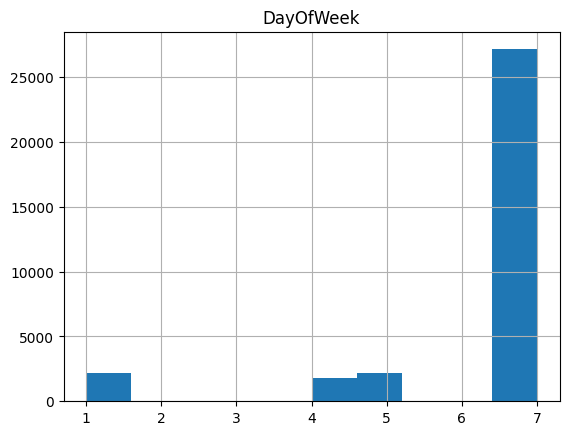

In [ ]:
# Check when the store was closed
train_store_closed.hist('DayOfWeek')

<Axes: >

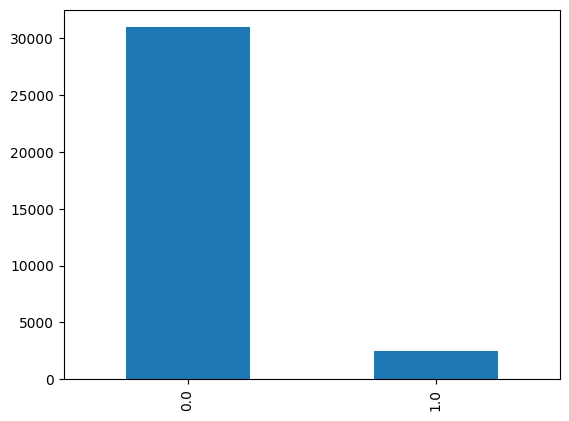

In [ ]:
train_store_closed['SchoolHoliday'].value_counts().plot(kind='bar')

<Axes: >

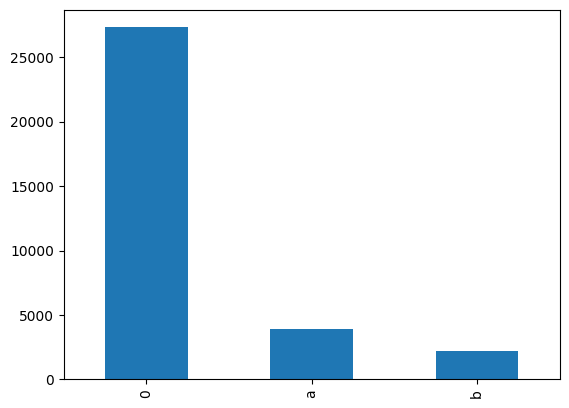

In [ ]:
# Check whether there school was closed for holyday
train_store_closed['StateHoliday'].value_counts().plot(kind='bar')

In [ ]:
# Check the null values
# In here there is no null value
train.isnull().sum()

Store            0
DayOfWeek        0
Sales            1
Customers        1
Open             1
Promo            1
StateHoliday     1
SchoolHoliday    1
dtype: int64

In [ ]:
# Number of days with closed stores
train[(train.Open == 0)].shape[0]

33444

In [ ]:
train[(train.Open == 1) & (train.Sales == 0)].shape[0]

2

In [ ]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace=True)

In [ ]:
store.isnull().sum().sum()

2340

In [ ]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [ ]:
test.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [ ]:
test.fillna(1, inplace=True)

In [ ]:
test.isnull().sum().sum()

0

In [ ]:
train_store_joined = pd.merge(train, store, on='Store', how='inner')
train_store_joined.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263.0,555.0,1.0,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,5020.0,546.0,1.0,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,4782.0,523.0,1.0,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,5011.0,560.0,1.0,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,6102.0,612.0,1.0,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [ ]:
train_store_joined[(train_store_joined.Open == 0) | (train_store_joined.Sales==0)].shape

(33446, 17)

In [ ]:
train_store_joined_open = train_store_joined[~((train_store_joined.Open ==0) | (train_store_joined.Sales==0))]
train_store_joined_open

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263.0,555.0,1.0,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,5020.0,546.0,1.0,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,4782.0,523.0,1.0,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,5011.0,560.0,1.0,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,6102.0,612.0,1.0,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196214,1115,4,4827.0,367.0,1.0,0.0,0,0.0,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
196215,1115,3,5206.0,405.0,1.0,0.0,0,0.0,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
196216,1115,2,4714.0,359.0,1.0,0.0,0,0.0,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
196217,1115,1,5604.0,394.0,1.0,0.0,0,0.0,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


<Axes: >

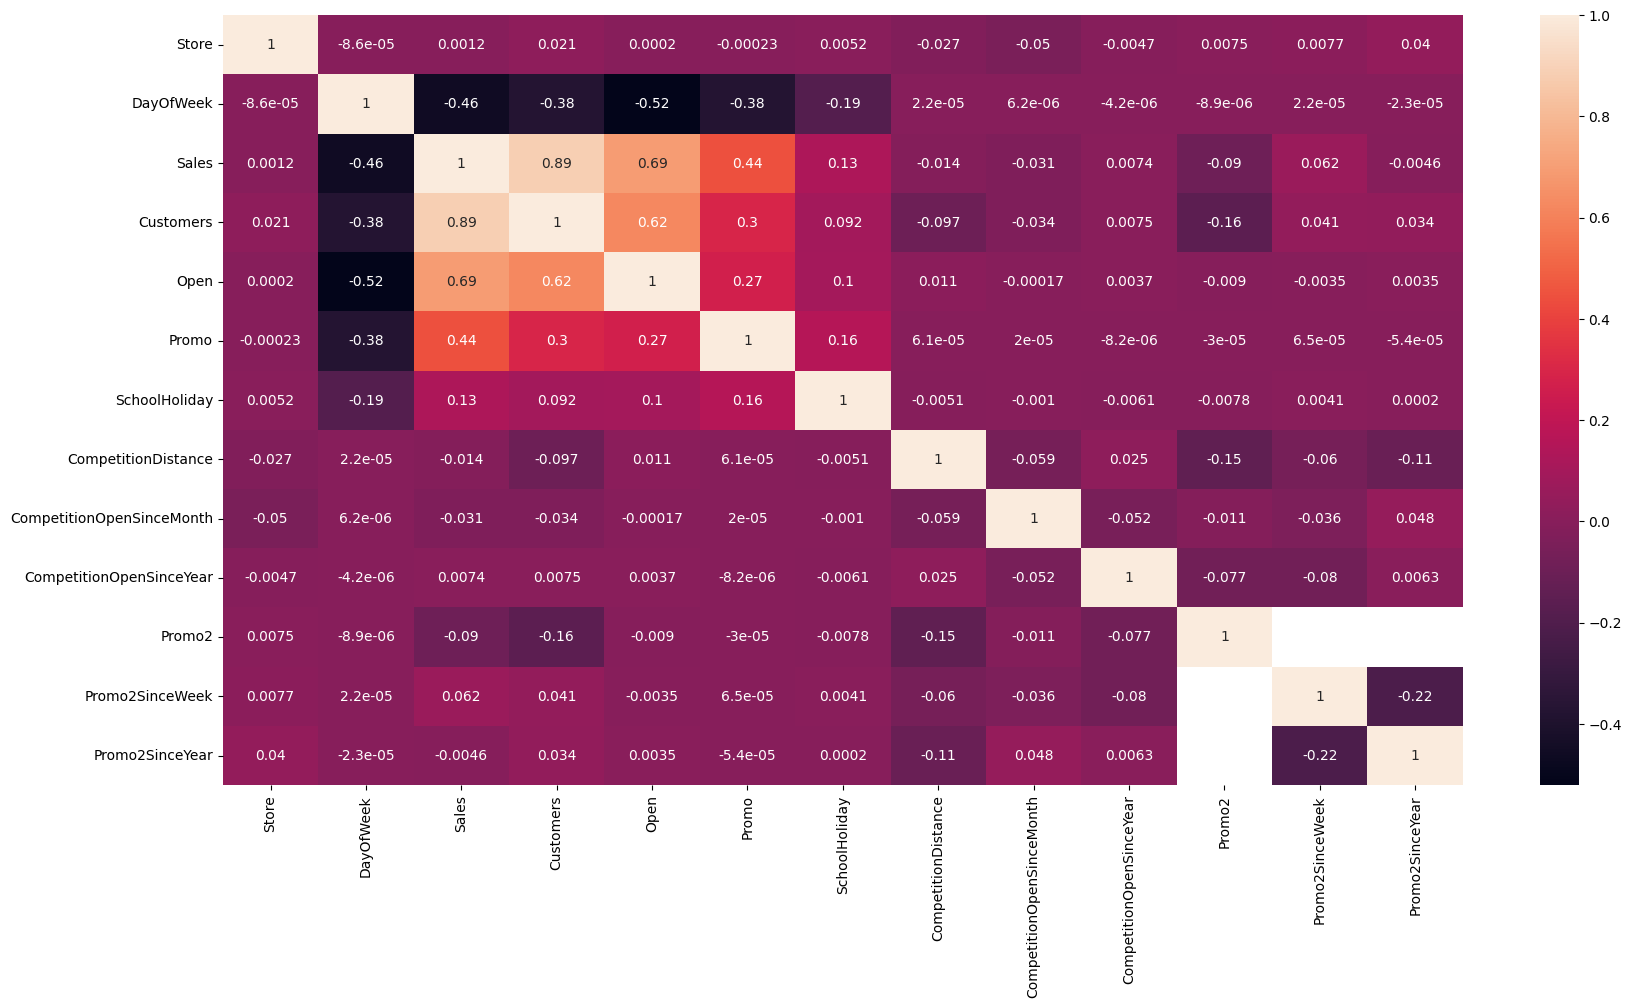

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(train_store_joined.corr(), annot=True)